### Required Packages

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Datasets

In [2]:
cust = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/Datasets/CUSTOMERS.csv')
loc = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/Datasets/GEO_LOCATION.csv')
ord_item = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/Datasets/ORDER_ITEMS.csv')
ord_pay = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/Datasets/ORDER_PAYMENTS.csv')
ord_rate = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/Datasets/ORDER_REVIEW_RATINGS.csv')
order = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/Datasets/ORDERS.csv')
product = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/Datasets/PRODUCTS.csv')
seller = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/Datasets/SELLERS.csv')

In [3]:
#df1 Order & Order Payment
df1 = pd.merge(left=order,right=ord_pay,how='left',left_on='order_id',right_on='order_id')

In [4]:
#df2 Order Rating
df2 = pd.merge(left=df1,right=ord_rate,how='left',left_on=['order_id'],right_on=['order_id'])

In [5]:
#df3 Order Items
df3 = pd.merge(left=df2,right=ord_item,how='left',left_on=['order_id'],right_on=['order_id'])

In [6]:
#df4 Products
df4 = pd.merge(left=df3,right=product,how='left',left_on=['product_id'],right_on=['product_id'])

In [7]:
#df5 sellers
df5 = pd.merge(left=df4,right=seller,how='left',left_on=['seller_id'],right_on=['seller_id'])

In [8]:
#df6 sellers
df6 = pd.merge(left=df5,right=cust,how='left',left_on=['customer_id'],right_on=['customer_id'])

In [9]:
#df7 sellers
df7 = pd.merge(left=df6,right=loc,how='left',left_on=['seller_zip_code_prefix'],right_on=['geolocation_zip_code_prefix'])

In [10]:
#df8 sellers
df8 = pd.merge(left=df7,right=loc,how='left',left_on=['customer_zip_code_prefix'],right_on=['geolocation_zip_code_prefix'],suffixes=('_Seller','_Cust'))

In [11]:
df8.to_csv('C:/Users/Nithin/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/Datasets/Final.csv')

In [12]:
df_final = df8.loc[:,['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
'order_approved_at', 'order_delivered_carrier_date',
'order_delivered_customer_date', 'order_estimated_delivery_date',
'payment_sequential', 'payment_type', 'payment_installments',
'payment_value', 'review_id', 'review_score', 'review_creation_date',
'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
'shipping_limit_date', 'price', 'freight_value',
'product_category_name', 'product_name_lenght',
'product_description_lenght', 'product_photos_qty', 'product_weight_g',
'product_length_cm', 'product_height_cm', 'product_width_cm',
'seller_zip_code_prefix','geolocation_lat_Seller','geolocation_lng_Seller' ,'seller_city', 'seller_state',
'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
'customer_state','geolocation_lat_Cust',
'geolocation_lng_Cust']]

### Data Preparation

In [13]:
df_final.order_purchase_timestamp = pd.to_datetime(df_final.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')
df_final.order_approved_at = pd.to_datetime(df_final.order_approved_at, format = '%m/%d/%Y %H:%M')
df_final.order_delivered_carrier_date = pd.to_datetime(df_final.order_delivered_carrier_date, format = '%m/%d/%Y %H:%M')
df_final.order_estimated_delivery_date = pd.to_datetime(df_final.order_estimated_delivery_date, format = '%m/%d/%Y %H:%M')
df_final.review_creation_date = pd.to_datetime(df_final.review_creation_date, format = '%m/%d/%Y %H:%M')
df_final.review_answer_timestamp = pd.to_datetime(df_final.review_answer_timestamp, format = '%m/%d/%Y %H:%M')
df_final.shipping_limit_date = pd.to_datetime(df_final.shipping_limit_date, format = '%m/%d/%Y %H:%M')

### 1.	Perform Detailed exploratory analysis

##### a.	Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

##### b.	Understanding how many new customers acquired every month

##### c.	Understand the retention of customers on month on month basis

##### d.	How the revenues from existing/new customers on month on month basis

##### e.	Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

##### f.	Popular Products by month, seller, state, category.

##### g.	Popular categories by state, month

##### h.	List top 10 most expensive products sorted by price

In [38]:
#a.

#Total Revenue
tot_rev = df_final['payment_installments'] * df_final['payment_value']
tot_rev.sum()

#Total Quantity
df_final.order_item_id.count()

#Total Products
df_final.product_id.nunique()

#Total Categories
df_final.product_category_name.nunique()

#Total Sellers
df_final.seller_id.nunique()

#Total Locations
loc.geolocation_zip_code_prefix.nunique()

#Total Payments
df_final.payment_type.nunique()

5

In [42]:
df_final.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'geolocation_lat_Seller',
       'geolocation_lng_Seller', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_lat_Cust', 'geolocation_lng_Cust'],
      dtype='object')

In [78]:
#b

df9 = df_final.loc[:,['customer_id','order_purchase_timestamp']]
df9['Year_month'] = df9.order_purchase_timestamp.apply(lambda x : pd.Timestamp.strftime(x,format= '%Y/%m'))
df9.drop(columns = 'order_purchase_timestamp',inplace = True)
df10 = pd.DataFrame(df9.groupby('Year_month')['customer_id'].count())
df10

,customer_id
Year_month,
2016/09,7
2016/10,402
2016/12,1
2017/01,1035
2017/02,2123
2017/03,3243
2017/04,2878
2017/05,4485
2017/06,3853


<AxesSubplot:xlabel='Year_month'>

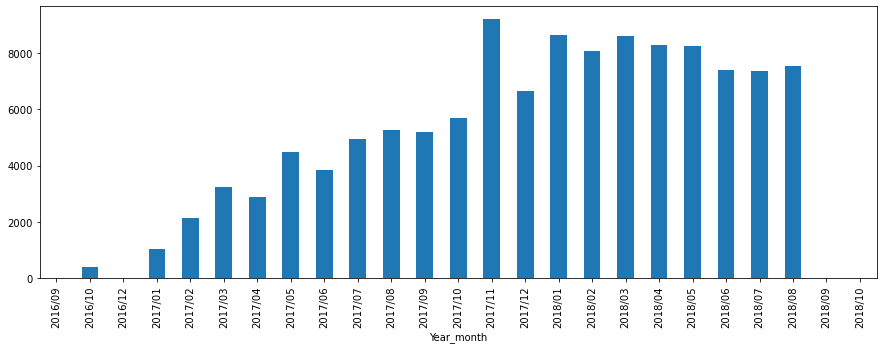

In [72]:
df10.plot(kind = 'bar',figsize = (15,5))

In [95]:
#c.

tot_cust = df_final.customer_id.count()

<AxesSubplot:xlabel='Year_month'>

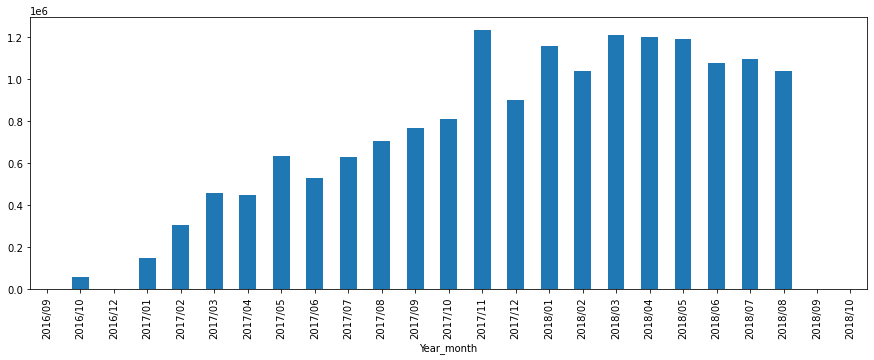

In [112]:
#d.

df9['Revenue'] = df_final.price + df_final.freight_value
df9.groupby('Year_month').Revenue.sum().plot(kind= 'bar',figsize=(15,5))

In [122]:
#e

df_final['year_month'] = df_final.order_purchase_timestamp.apply(lambda x : pd.Timestamp.strftime(x,format= '%Y/%m'))
df_final.groupby('year_month').aggregate({'product_id':'count','price':'sum'})

,product_id,price
year_month,,
2016/09,6,267.36
2016/10,386,51468.91
2016/12,1,10.90
2017/01,1023,129895.32
2017/02,2073,262013.86
2017/03,3201,398117.44
2017/04,2864,392595.36
2017/05,4445,549226.84
2017/06,3822,456867.47


In [123]:
df_final.groupby('product_category_name').aggregate({'product_id':'count','price':'sum'})

,product_id,price
product_category_name,,
Agro_Industry_And_Commerce,252,83841.95
Air_Conditioning,302,55962.38
Art,219,24721.97
Arts_And_Craftmanship,24,1814.01
Audio,381,52500.27
...,...,...
Stationery,2625,239385.97
Tablets_Printing_Image,87,7840.31
Telephony,4726,339571.03


In [136]:
#f

df_final.groupby(['year_month','product_category_name']).aggregate({'product_id':'count'})

product_id
year_month product_category_name                              
2016/09    Furniture_Decor                                   2
           Health_Beauty                                     3
           Telephony                                         1
2016/10    Air_Conditioning                                 10
           Audio                                             2
...                                                        ...
2018/08    Stationery                                      172
           Telephony                                       289
           Toys                                            170
           Watches_Gifts                                   428
2018/09    Kitchen_Dining_Laundry_Garden_Furniture           1

[1253 rows x 1 columns]

In [137]:
df_final.groupby(['seller_id','product_category_name']).agg({'product_id':'count'})

product_id
seller_id                        product_category_name                      
0015a82c2db000af6aaaf3ae2ecb0532 Small_Appliances                          3
001cca7ae9ae17fb1caed9dfb1094831 Construction_Tools_Construction          27
                                 Garden_Tools                            214
001e6ad469a905060d959994f1b41e4f Sports_Leisure                            1
002100f778ceb8431b7a1020ff7ab48f Furniture_Decor                          59
...                                                                      ...
ffff564a4f9085cd26170f4732393726 Construction_Tools_Construction           1
                                 Electronics                               2
                                 Food                                      2
                                 Housewares                                2
                                 Market_Place                              1

[6352 rows x 1 columns]

In [148]:
#h.

pd.DataFrame(df_final.groupby('product_id').agg({'price':'sum'})).sort_values('price',ascending=False).head(10)

,price
product_id,
bb50f2e236e5eea0100680137654686c,68810.00
d6160fb7873f184099d9bc95e30376af,56948.83
6cdd53843498f92890544667809f1595,55779.90
d1c427060a0f73f6b889a5c7c61f2ac4,49141.40
99a4788cb24856965c36a24e339b6058,46575.66
25c38557cf793876c5abdd5931f922db,44829.32
3dd2a17168ec895c781a9191c1e95ad7,41682.20
aca2eb7d00ea1a7b8ebd4e68314663af,38248.20
53b36df67ebb7c41585e8d54d6772e08,38158.21


### 2.	Performing Customers/sellers Segmentation

##### a.	Divide the customers into groups based on the revenue generated

##### b.	Divide the sellers into groups based on the revenue generated

In [173]:
#a.

df_final['Revenue'] = df_final.price + df_final.freight_value
df11 = pd.DataFrame(df_final.groupby('customer_id').Revenue.sum())
LC = df_final.groupby('customer_id').Revenue.sum().max()* 0.25

In [174]:
df12 = pd.cut(df11.Revenue,bins=np.arange(0,15000,LC),
              labels=['Low','Avg','Good','High'])
df12

customer_id
00012a2ce6f8dcda20d059ce98491703    Low
000161a058600d5901f007fab4c27140    Low
0001fd6190edaaf884bcaf3d49edf079    Low
0002414f95344307404f0ace7a26f1d5    Low
000379cdec625522490c315e70c7a9fb    Low
                                   ... 
fffecc9f79fd8c764f843e9951b11341    Low
fffeda5b6d849fbd39689bb92087f431    Low
ffff42319e9b2d713724ae527742af25    Low
ffffa3172527f765de70084a7e53aae8    Low
ffffe8b65bbe3087b653a978c870db99    NaN
Name: Revenue, Length: 99441, dtype: category
Categories (4, object): ['Low' < 'Avg' < 'Good' < 'High']

In [175]:
#b.

df13 = pd.DataFrame(df_final.groupby('seller_id').Revenue.sum())
LC = df_final.groupby('customer_id').Revenue.sum().max()* 0.25

In [176]:
df14 = pd.cut(df13.Revenue,bins=np.arange(0,15000,LC),
              labels=['Low','Avg','Good','High'])
df14

seller_id
0015a82c2db000af6aaaf3ae2ecb0532     Low
001cca7ae9ae17fb1caed9dfb1094831     NaN
001e6ad469a905060d959994f1b41e4f     Low
002100f778ceb8431b7a1020ff7ab48f     Low
003554e2dce176b5555353e4f3555ac8     Low
                                    ... 
ffcfefa19b08742c5d315f2791395ee5     Low
ffdd9f82b9a447f6f8d4b91554cc7dd3     Low
ffeee66ac5d5a62fe688b9d26f83f534     Low
fffd5413c0700ac820c7069d66d98c89    High
ffff564a4f9085cd26170f4732393726     Low
Name: Revenue, Length: 3095, dtype: category
Categories (4, object): ['Low' < 'Avg' < 'Good' < 'High']

### 3.	Cross-Selling (Which products are selling together)

##### Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)


In [189]:
df15 = df_final.loc[:,['customer_id','order_purchase_timestamp','product_id']].drop_duplicates().sort_values(['customer_id','order_purchase_timestamp'])

### 4.	Payment Behaviour

##### a. How customers are paying?

##### b. Which payment channels are used by most customers?

In [221]:
#a.

df_final.payment_type.unique()

array(['credit_card', 'voucher', 'UPI', 'debit_card', 'not_defined', nan],
      dtype=object)

In [223]:
#b.

df_final.groupby('payment_type').Revenue.sum().sort_values(ascending = False)

payment_type
credit_card    12777900.97
UPI             2859446.84
voucher          791647.56
debit_card       216038.08
not_defined           0.00
Name: Revenue, dtype: float64

### 5.	Customer satisfaction towards category & product

##### a.Which categories (top 10) are maximum rated & minimum rated ?
##### b.Which products (top10) are maximum rated & minimum rated ?
##### c.Average rating by location, seller, product, category, month etc.


In [240]:
#a

df17 = pd.DataFrame(df_final.groupby('product_category_name').review_score.sum()).sort_values('review_score',ascending=False)
df17.head(10)

,review_score
product_category_name,
Bed_Bath_Table,46366
Health_Beauty,41318
Sports_Leisure,36856
Furniture_Decor,34407
Computers_Accessories,32002
Housewares,29854
Watches_Gifts,24856
Telephony,18612
Garden_Tools,18412


In [239]:
df17.tail(10)

,review_score
product_category_name,
Furniture_Mattress_And_Upholstery,156
Flowers,139
Fashion_Sport,132
Diapers_And_Hygiene,127
Home_Comfort_2,105
Arts_And_Craftmanship,99
Cds_Dvds_Musicals,65
La_Cuisine,63
Fashion_Childrens_Clothes,36


In [241]:
#b

df18 = pd.DataFrame(df_final.groupby('product_id').review_score.sum()).sort_values('review_score',ascending=False)
df18.head(10)

,review_score
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,2149
99a4788cb24856965c36a24e339b6058,2047
422879e10f46682990de24d770e7f83d,1993
389d119b48cf3043d311335e499d9c6b,1665
368c6c730842d78016ad823897a372db,1553
53759a2ecddad2bb87a079a1f1519f73,1516
d1c427060a0f73f6b889a5c7c61f2ac4,1456
53b36df67ebb7c41585e8d54d6772e08,1368
154e7e31ebfa092203795c972e5804a6,1274


In [242]:
df18.tail(10)

,review_score
product_id,
e15f2eb4bd9c94996e56cc76c1394361,1
71bdf1a4d18c3cd68f108547f0b4cd1c,1
c7dd52c6177b277973286c741e7894cb,1
a0de6ed943a47ab1ea06555cb9fddbab,1
e15014500e7941bc3fae1757c3cd48ad,1
a0e45a99e446ebadec0421e41666235b,1
4c165ddec9f86318b210a89f1e3b6761,1
6b5d792112275a0262356e64e098025f,1
f25de2089ffdbd1c151d1e971b67a928,1


In [245]:
#c

df_final.groupby('customer_state').review_score.mean().round(2)

customer_state
Andhra Pradesh       3.98
Arunachal Pradesh    4.01
Chhattisgarh         4.02
Delhi                4.02
Goa                  4.80
Gujarat              4.02
Haryana              4.09
Himachal Pradesh     3.97
Jammu & Kashmir      3.99
Karnataka            4.00
Kerala               4.03
Madhya Pradesh       3.97
Maharashtra          4.07
Orissa               4.08
Punjab               4.15
Rajasthan            4.09
Tamil Nadu           4.10
Uttar Pradesh        4.12
Uttaranchal          3.72
West Bengal          3.99
Name: review_score, dtype: float64

<AxesSubplot:ylabel='review_score'>

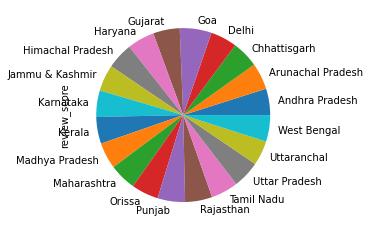

In [254]:
df_final.groupby('customer_state').review_score.mean().round(2).plot(kind = 'pie')

In [248]:
df_final.groupby('seller_id').review_score.mean().round(2)

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.67
001cca7ae9ae17fb1caed9dfb1094831    3.88
001e6ad469a905060d959994f1b41e4f    1.00
002100f778ceb8431b7a1020ff7ab48f    4.03
003554e2dce176b5555353e4f3555ac8    5.00
                                    ... 
ffcfefa19b08742c5d315f2791395ee5    1.00
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.29
ffeee66ac5d5a62fe688b9d26f83f534    4.21
fffd5413c0700ac820c7069d66d98c89    3.84
ffff564a4f9085cd26170f4732393726    2.10
Name: review_score, Length: 3095, dtype: float64

In [253]:
df_final.groupby('product_category_name').review_score.mean().round(2)

product_category_name
Agro_Industry_And_Commerce    4.15
Air_Conditioning              3.92
Art                           3.92
Arts_And_Craftmanship         4.12
Audio                         3.82
                              ... 
Stationery                    4.18
Tablets_Printing_Image        4.05
Telephony                     3.94
Toys                          4.14
Watches_Gifts                 4.00
Name: review_score, Length: 71, dtype: float64

<AxesSubplot:xlabel='year_month'>

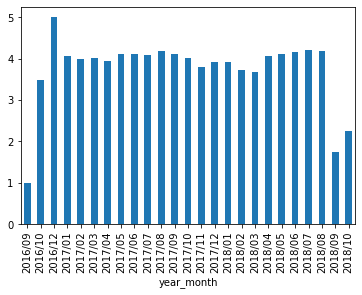

In [250]:
df_final.groupby('year_month').review_score.mean().round(2).plot(kind='bar')